# 1. Implement Naive Bayes Classifier from Scratch

## Load data from Google Drive

In [1]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

# FOLDERNAME = "Colab\ Notebooks/MLBigData/hw1"

# %cd drive/MyDrive/$FOLDERNAME

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Do some basic checks on datasets
1. Rows should be 60,000 since there are 60,000 training data
2. Columns should be 784 since it is a flatten pixels of 28x28



In [3]:
# Read file
train_images = pd.read_csv("train_images.csv", header=None)

In [4]:
train_images.shape

(60000, 784)

## Check if there is missing data

In [5]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 358.9 MB


In [6]:
train_label = pd.read_csv("train_labels.csv", header=None)

In [7]:
train_label.shape

(60000, 1)

In [8]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


## Try to plot the origin image out

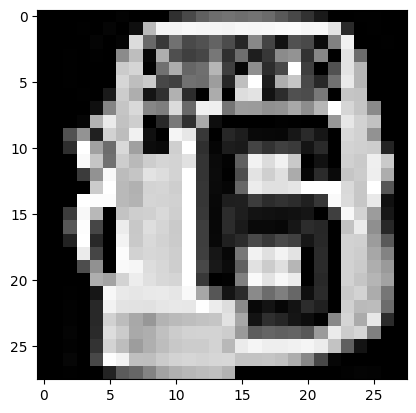

In [9]:
# check image
plt.imshow(train_images.iloc[6000].values.reshape(28, 28), cmap="gray")
plt.show()

## Define a binarization function
*   All pixel values less than threshold are given value 0
*   All pixel values greater than or equal to threshold are given value 1



In [10]:
def binarization(dataframe, threshold=127):
  output = (dataframe.iloc[:] >= threshold).astype(int)
  return output

## Check the binarized result

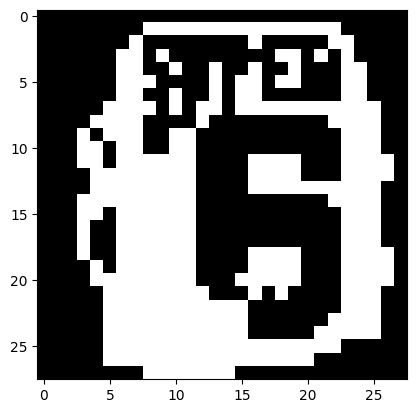

In [11]:
bi_df = binarization(train_images)
bi_df.shape
plt.imshow(bi_df.iloc[6000].values.reshape(28, 28), cmap="gray")
plt.show()

## Filter dataset into only two classes
* Trouser: 1
* Pullover: 2

In [12]:
train_images = train_images[(train_label[0]== 1)|(train_label[0]== 2)]
train_label = train_label[(train_label[0]== 1)|(train_label[0]== 2)]
print("Shape of data", train_images.shape)
print("Shape of label:", train_label.shape)

Shape of data (12000, 784)
Shape of label: (12000, 1)


In [13]:
train_label.head(3)

,0
5,2
7,2
16,1


## Calculate Prior Possibilities: P(y)

In [14]:
# Convert train data (binarized) and label data into numpy arrays
train_X = binarization(train_images).to_numpy()

# Reshape labels
train_y = train_label.to_numpy().reshape((-1,))
print("Shape of train_X:", train_X.shape)
print("Shape of train_y:", train_y.shape)

Shape of train_X: (12000, 784)
Shape of train_y: (12000,)


In [15]:
# Get the number of train data and the number of features
n_train, n_features = train_X.shape
print("Number of data:", n_train)
print("Number of features:", n_features)

Number of data: 12000
Number of features: 784


In [16]:
# Get all the classes and class count
classes = np.unique(train_y)
n_classes = len(classes)
print("Classes:", classes)
print("Number of classes:", n_classes)

Classes: [1 2]
Number of classes: 2


In [17]:
# Calculate prior possibilities: P(y)
# Initiate the possibility array
prior_possibilities = np.zeros(n_classes, dtype=np.float64)

for index, cls in enumerate(classes):
  # select all training data for each class
  X_class = train_X[train_y == cls]

  # get the number of data
  n = X_class.shape[0]

  # Update the prior possibility array
  # p(y) = numbers of y / numbers of total data
  prior_possibilities[index] = n / n_train

print("Shape of prior:", prior_possibilities.shape)
print(prior_possibilities)

Shape of prior: (2,)
[0.5 0.5]


## Calculate the likelihood: P(Xi|y) with Laplace Smoothing

Formula: P(xᵢ | y) = (count(xᵢ,y) + α) / (count(y) + α*N)
1. α is the smoothing factor, let's set α = 1
2. N is the total number of possible feature values. In our data, since it's binarized, so there will be only 2 possible values. Thus, N = 2.

In [18]:
likelihoods = np.zeros((n_classes, n_features), dtype=np.float64)
alpha = 1
N = 2

for index, cls in enumerate(classes):
  # select all training data for each class
  X_class = train_X[train_y == cls]

  # get the number of data
  n = X_class.shape[0]

  # calculate P(xi | y)
  likelihoods[index] = (np.sum(X_class, axis=0) + alpha)/ (n + alpha*N)

print("Shape of likelihoods:", likelihoods.shape)
print(likelihoods)


Shape of likelihoods: (2, 784)
[[0.00016661 0.00016661 0.00016661 ... 0.00033322 0.00033322 0.00016661]
 [0.00016661 0.00016661 0.00016661 ... 0.01266245 0.00166611 0.00016661]]


## Compute P(class/features) through code (No library allowed)

## Calculate the Posterior Probabilities Using Bernoulli Naive Bayes

### We want to maximize the following formula:
* y = argmax (log(P(x1 | y)) + log(P(x2 | y)) + ... + log(P(xn | y)) + log(P(y)))
* Use log to prevent "Underflow"

### Bernoulli Naive Bayes
* Use Bernoulli Naive Bayes to compute individual conditional possibility for each feature
* P(xi|y) = P(xi=1|y) * xi + (1-P(xi=1|y)) * (1-xi)

Source: https://scikit-learn.org/stable/modules/naive_bayes.html

### Compute P(class/features) through code (No library allowed)

In [19]:
# Use test data
test_images = pd.read_csv("test_images.csv", header=None)
test_labels = pd.read_csv("test_labels.csv", header=None)


# Filter test data
test_images = test_images[(test_labels[0]== 1)|(test_labels[0]== 2)]
test_labels = test_labels[(test_labels[0]== 1)|(test_labels[0]== 2)]

# binarize
test_X = binarization(test_images).to_numpy()

# Reshape labels
test_y = test_labels.to_numpy().reshape((-1,))

### Make class predictions based on the higher value of these computed probabilities (No library allowed)

Here is the formula derivation process
```
P(y∣Xi) = ∏ P(Xi∣y)P(y)
log(P(y∣Xi)) = ∑ log(P(Xi|y)) + log(P(y))
log(P(y|Xi)) = ∑ log(P(Xi=1|y)^x * P(Xi=0|y)^(1-x)) + log(P(y))
log(P(y|Xi)) = ∑ [x * log(P(Xi=1|y)) + (1-x) * log(P(Xi=0|y))] + log(P(y))

```



In [20]:
n_test = test_X.shape[0]
posteriors_bernoulli = np.zeros((n_test, n_classes), dtype=np.float64)

# Calculate the log value of likelihood
log_prob_ones = np.log(likelihoods) # log(P(x = 1 | y))
log_prob_zeros = np.log(1 - likelihoods) # log(P(x = 0 | y))


for index, cls in enumerate(classes):
  # Calculate the log value of prior possibility
  log_prior = np.log(prior_possibilities[index])

  # Sum over features
  # posterior_probs = logP(y) + sum( log(P(xi=1|y)) * xi + log((1-P(xi=1|y))) * (1-xi) )
  log_bernoulli = np.sum(log_prob_ones[index] * test_X  +
                          log_prob_zeros[index] * (1 - test_X), axis=1)

  posteriors_bernoulli[:, index] = log_prior + log_bernoulli

predictions_bernoulli = classes[np.argmax(posteriors_bernoulli , axis=1)]

print("Bernoulli Posteriors: ", posteriors_bernoulli)
print("Prediction Array: ", predictions_bernoulli)


Bernoulli Posteriors:  [[-978.6138318  -282.38639354]
 [-113.42479217 -393.68451593]
 [-164.76969093 -427.021381  ]
 ...
 [-113.83362476 -394.65817342]
 [-286.5991034  -456.74653516]
 [-147.27637281 -405.01509746]]
Prediction Array:  [2 1 1 ... 1 1 1]


## Compute Accurarcy

In [21]:
n = test_y.shape[0]
print(n)
accuracy = np.mean(predictions_bernoulli  == test_y)
print(f"Accuracy: {accuracy * 100}%")

2000
Accuracy: 93.4%


## ROC Curve

### 1. Convert log probabilities into normalized probabilities

In [22]:
# norm_probs = posteriors_bernoulli - np.max(posteriors_bernoulli, axis=1, keepdims=True)
norm_probs = posteriors_bernoulli - np.max(posteriors_bernoulli, axis=1, keepdims=True)
print(norm_probs[0:3])

[[-696.22743827    0.        ]
 [   0.         -280.25972376]
 [   0.         -262.25169008]]


In [23]:
# Calculate exponential to convert back from log
true_probs = np.exp(norm_probs)
true_probs = true_probs/ np.sum(true_probs, axis=1, keepdims=True)
probs_sum = np.sum(true_probs, axis=1)
print("Check if summation of probabilities equals to 1:", probs_sum [0:3])

Check if summation of probabilities equals to 1: [1. 1. 1.]


In [24]:
true_probs[0:5]

array([[4.28810500e-303, 1.00000000e+000],
       [1.00000000e+000, 1.92640888e-122],
       [1.00000000e+000, 1.27508205e-114],
       [1.00000000e+000, 1.33419493e-079],
       [1.00000000e+000, 2.93562972e-099]])

#### 2. Calculate ROC curve for Trousers (class 1) and Pullovers (class 2)
Notes: Add 1.1 into threshold because we want a value larger than 1.0 to produce point (0, 0) at ROC Curve. This is also stated in scikit-learn's official docs:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

> An arbitrary threshold is added for the case tpr=0 and fpr=0 to ensure that the curve starts at (0, 0). This threshold corresponds to the np.inf.



In [25]:
# Set thresholds as [0.0 - 1.1] increment 0.05 each time
THRESHOLDS = np.arange(0, 1.1, 0.05)

def calculate_roc(y_true, class_scores, classes, thresholds):
    all_positives = np.sum(y_true) # TP + FN (total actual positive)
    all_negatives = len(y_true) - all_positives # TN + FP(total actual negative)
    fpr_values = []
    tpr_values = []

    for threshold in thresholds:
        predictions = (class_scores >= threshold).astype(int)
        TP = np.sum((predictions == 1) & (y_true == 1))
        FP = np.sum((predictions == 1) & (y_true == 0))
        # Need to prevent denominator is 0
        TPR = TP / all_positives if all_positives > 0 else 0
        FPR = FP / all_negatives if all_negatives > 0 else 0
        fpr_values.append(FPR)
        tpr_values.append(TPR)

    return np.array(fpr_values), np.array(tpr_values), thresholds

In [26]:
# Get the trousers score for the probabilities
trousers_scores = true_probs[:, 0]
# Create labels (1 if true class is Trousers)
y_true_trousers = (test_y == 1).astype(int)

# Sort the scores and corresponding label
indices = np.argsort(trousers_scores)
trousers_scores_sorted = trousers_scores[indices]
y_true_trousers_sorted = y_true_trousers[indices]

trouser_fpr, trouser_tpr, _ = calculate_roc(
    y_true_trousers_sorted,
    trousers_scores_sorted,
    1,
    THRESHOLDS)

In [27]:
y_true_trousers_sorted = (y_true_trousers_sorted == 1).astype(int)
y_true_trousers_sorted

array([0, 0, 1, ..., 1, 1, 1], shape=(2000,))

In [28]:
# Get the pullovers score for the probabilities
pullovers_scores = true_probs[:, 1]
# Create labels (2 if true class is Pullovers)
y_true_pullovers = (test_y == 2).astype(int)

# Sort the scores and corresponding label
indices = np.argsort(pullovers_scores)
pullovers_scores_sorted = pullovers_scores[indices]
y_true_pullovers_sorted = y_true_pullovers[indices]

pullover_fpr, pullover_tpr, _ = calculate_roc(
    y_true_pullovers_sorted,
    pullovers_scores_sorted,
    2,
    THRESHOLDS)

#### Calculate AUC and Plot ROC Curves
Note: I tried Bernoulli Classifier and Simple Classifier implement above and found out that Simple Classifier has slightly better AUC in Pullover (0.97 vs. 0.92), while AUC in Trouser remains the same. Therefore, I choose Simple Classifier

/var/folders/66/1q8bft0j43j9_rs20_lp5zj80000gn/T/ipykernel_23308/1407858592.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  trouser_auc = np.trapz(trouser_tpr[indices], trouser_fpr[indices])
/var/folders/66/1q8bft0j43j9_rs20_lp5zj80000gn/T/ipykernel_23308/1407858592.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pullover_auc = np.trapz(pullover_tpr[indices], pullover_fpr[indices])


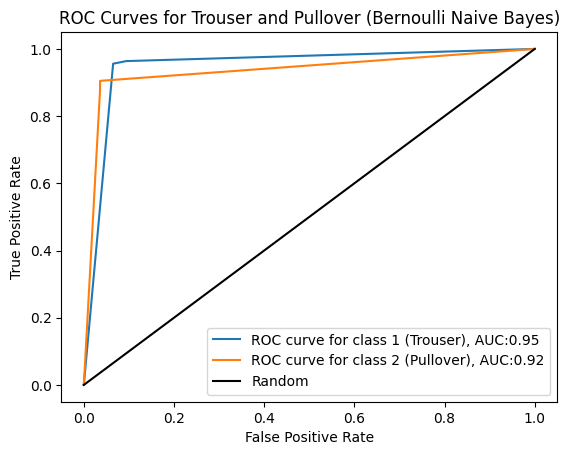

In [29]:
# Sort
indices = np.argsort(trouser_fpr)
trouser_auc = np.trapz(trouser_tpr[indices], trouser_fpr[indices])

indices = np.argsort(pullover_fpr)
pullover_auc = np.trapz(pullover_tpr[indices], pullover_fpr[indices])

plt.plot(trouser_fpr, trouser_tpr, label=f"ROC curve for class 1 (Trouser), AUC:{trouser_auc:.2f}")
plt.plot(pullover_fpr, pullover_tpr, label=f"ROC curve for class 2 (Pullover), AUC:{pullover_auc:.2f}")
plt.plot([0, 1], [0, 1], "k", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Trouser and Pullover (Bernoulli Naive Bayes)")
plt.legend(loc="lower right")
plt.show()

## Conver Bernoulli Naive Bayes Classifier into Individual Classes


In [30]:
class BernoulliNaiveBayesClassifier:
  def __init__(self, alpha=1.0, N=2):
    self.alpha = alpha
    self.N = N
    self.classes = None
    self.n_classes = 0
    self.n_features = 0
    self.likelihoods = None
    self.prior_possibilities = None

  def fit(self, X, y):
    X = np.asarray(X)
    y = np.asarray(y)

    n_data, self.n_features = X.shape

    self.classes = np.unique(y)
    self.n_classes = len(self.classes)

    self.likelihoods = np.zeros((self.n_classes, self.n_features), dtype=np.float64)
    self.prior_possibilities = np.zeros(self.n_classes, dtype=np.float64)

    # compute likelihoods
    for index, cls in enumerate(self.classes):
      X_class = X[y == cls]
      n = X_class.shape[0]
      self.prior_possibilities[index] = n / n_data
      self.likelihoods[index] = (np.sum(X_class, axis=0) + self.alpha) / (n + self.alpha * self.N)

  def predict(self, X):
    X = np.asarray(X)
    n_data = X.shape[0]

    posteriors = np.zeros((n_data, self.n_classes), dtype=np.float64)

    log_prob_ones = np.log(self.likelihoods)
    log_prob_zeros = np.log(1 - self.likelihoods)

    for index, cls in enumerate(self.classes):
        log_prior = np.log(self.prior_possibilities[index])
        log_bernoulli = np.sum(log_prob_ones[index] * X + log_prob_zeros[index] * (1 - X), axis=1)
        posteriors[:, index] = log_prior + log_bernoulli
    predictions = self.classes[np.argmax(posteriors, axis=1)]
    return predictions

  # The following part of code is copied and rewritten from the part that calculate ROC curve
  def predict_proba(self, X):
    X = np.asarray(X)
    n_data = X.shape[0]

    posteriors = np.zeros((n_data, self.n_classes), dtype=np.float64)

    log_prob_ones = np.log(self.likelihoods)
    log_prob_zeros = np.log(1 - self.likelihoods)

    for index, cls in enumerate(self.classes):
        log_prior = np.log(self.prior_possibilities[index])
        log_bernoulli = np.sum(log_prob_ones[index] * X + log_prob_zeros[index] * (1 - X), axis=1)
        posteriors[:, index] = log_prior + log_bernoulli

    norm_probs = posteriors - np.max(posteriors, axis=1, keepdims=True)
    true_probs = np.exp(norm_probs)
    true_probs = true_probs / np.sum(true_probs, axis=1, keepdims=True)
    return true_probs

# 2. Implement Additional Machine Learning Model (use libraries here)
Use Decision tree technique to differentiate classify samples between Trouser and Pullover. **You should use gini index for discriminatory features and maximum tree height should be 10**.

### Import Libraries

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

### Load data set again for seperate calculation

In [32]:
train = pd.read_csv("train_images.csv", header=None)
label = pd.read_csv("train_labels.csv", header=None)

# apply masking, select only Trousers and Pullovers
mask = (label[0]== 1) | (label[0]== 2)

train_X = train[mask]
train_y = label[mask]

# Binarization
train_X = binarization(train_X).to_numpy()
train_y = train_y.to_numpy().reshape(-1)


print("X's shape: ", train_X.shape)
print("y's shape: ", train_y.shape)

X's shape:  (12000, 784)
y's shape:  (12000,)


### Create model
parameters align with project's requirements

In [33]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=10)

### Fit and predict

In [34]:
classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10)

In [35]:
# Use test data
test = pd.read_csv("test_images.csv", header=None)
test_label = pd.read_csv("test_labels.csv", header=None)

mask = (test_label[0]== 1) | (test_label[0]== 2)

test_X = test[mask]
test_X = binarization(test_X).to_numpy()
test_y = test_label[mask].to_numpy()

In [36]:
# Make prediction
predictions = classifier.predict(test_X)

In [37]:
# Evaluate
acc = accuracy_score(test_y, predictions)
print(f"Acc: {acc*100:.2f}%")
print("=" * 100)
print("Classification Report: ", classification_report(test_y, predictions))

Acc: 97.30%
Classification Report:                precision    recall  f1-score   support

           1       0.97      0.97      0.97      1000
           2       0.97      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



### Probabilities, Predictions and ROC

In [38]:
probabilities = classifier.predict_proba(test_X)
print("Probabilities: ", probabilities)

Probabilities:  [[0.         1.        ]
 [0.99745995 0.00254005]
 [0.99745995 0.00254005]
 ...
 [0.99745995 0.00254005]
 [1.         0.        ]
 [0.99745995 0.00254005]]


In [39]:
predictions = classifier.predict(test_X)
print("Predictions: ", predictions)

Predictions:  [2 1 1 ... 1 1 1]


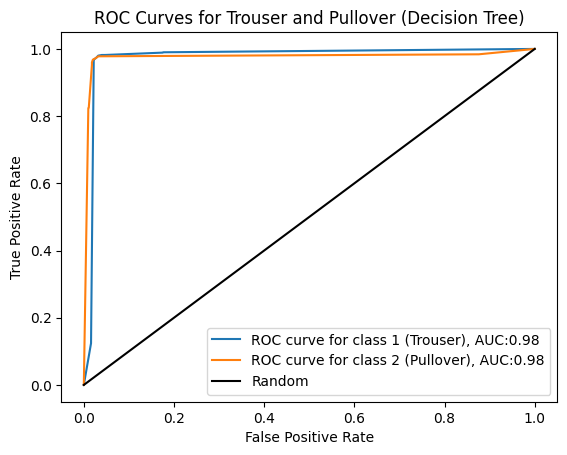

In [40]:
from sklearn.metrics import roc_curve, auc

trousers_prob = probabilities[:, 0]
pullovers_prob = probabilities[:, 1]

# Convert test_y to Trousers 1, Pullovers 0 | Trousers 0, Pullovers 1
test_y_t = (test_y == 1).astype(int)
test_y_p = (test_y == 2).astype(int)

# Trousers
fpr_t, tpr_t, _ = roc_curve(test_y_t, trousers_prob)
roc_auc_t = auc(fpr_t, tpr_t)

# Pullovers
fpr_p, tpr_p, _= roc_curve(test_y_p, pullovers_prob)
roc_auc_p = auc(fpr_p, tpr_p)


plt.plot(fpr_t, tpr_t, label=f"ROC curve for class 1 (Trouser), AUC:{roc_auc_t:.2f}")
plt.plot(fpr_p, tpr_p, label=f"ROC curve for class 2 (Pullover), AUC:{roc_auc_p:.2f}")
plt.plot([0, 1], [0, 1], "k", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Trouser and Pullover (Decision Tree)")
plt.legend(loc="lower right")
plt.show()


# 3. Comparison and Analysis:

In [41]:
# Import more libraries
from sklearn.metrics import precision_score, recall_score

In [42]:
# Load data and process again for seperation
train = pd.read_csv("train_images.csv", header=None)
label = pd.read_csv("train_labels.csv", header=None)

mask = (label[0]== 1) | (label[0]== 2)

train_X = train[mask]
train_y = label[mask]

train_X = binarization(train_X).to_numpy()
train_y = train_y.to_numpy().reshape(-1)

test = pd.read_csv("test_images.csv", header=None)
test_label = pd.read_csv("test_labels.csv", header=None)

mask = (test_label[0]== 1) | (test_label[0]== 2)

test_X = test[mask]
test_X = binarization(test_X).to_numpy()
test_y = test_label[mask].to_numpy().reshape(-1)

In [43]:
# Naive Bayes Bernoulli for test and train
#--------------------------------------
# Test
#--------------------------------------
bernoulli_classifier = BernoulliNaiveBayesClassifier()
bernoulli_classifier.fit(train_X, train_y)
bernoulli_test_predict = bernoulli_classifier.predict(test_X)

#--------------------------------------
# Train
#--------------------------------------
bernoulli_train_predict = bernoulli_classifier.predict(train_X)

print(f"Bernoulli Naive Bayes Test Accuracy: {np.mean(bernoulli_test_predict == test_y)* 100:.2f}%")
print(f"Bernoulli Naive Bayes Train Accuracy: {np.mean(bernoulli_train_predict == train_y)* 100:.2f}%")



# Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(criterion="gini", max_depth=10)
tree_classifier.fit(train_X, train_y)
#--------------------------------------
# Test
#--------------------------------------
dt_test_pred = tree_classifier.predict(test_X)

#--------------------------------------
# Train
#--------------------------------------
dt_train_pred = tree_classifier.predict(train_X)

print(f"Decision Tree Test Accuracy: {accuracy_score(test_y, dt_test_pred)*100:.2f}%")
print(f"Decision Tree Test Accuracy: {accuracy_score(train_y, dt_train_pred)*100:.2f}%")

Bernoulli Naive Bayes Test Accuracy: 93.40%
Bernoulli Naive Bayes Train Accuracy: 93.18%
Decision Tree Test Accuracy: 97.35%
Decision Tree Test Accuracy: 99.17%


In [44]:
# Class-wise comparision
def get_metrics(true_values, predictions, classes, model_name: str, dataset: str):
  acc = accuracy_score(true_values, predictions)
  precision = precision_score(true_values, predictions, average=None, labels=classes)
  recall = recall_score(true_values, predictions, average=None, labels=classes)
  print(f"{model_name} - {dataset}:")
  print(f"Overall Accuracy: {acc:.2f}")
  print(f"Precision (Trousers, Pullovers): ({precision[0]:.2f}, {precision[1]:.2f})")
  print(f"Recall (Trousers, Pullovers): ({recall[0]:.2f}, {recall[1]:.2f})")
  print("=" * 100)

In [45]:
bernoulli_naive_bayes_test = get_metrics(test_y, bernoulli_test_predict, classes, "Bernoulli Naive Bayes", "Test Dataset")
bernoulli_naive_bayes_train = get_metrics(train_y, bernoulli_train_predict, classes, "Bernoulli  Naive Bayes", "Train Dataset")
decision_tree_test = get_metrics(test_y, dt_test_pred, classes, "Decision Tree", "Test Dataset")
decision_tree_train = get_metrics(train_y, dt_train_pred, classes, "Decision Tree", "Train Dataset")

# Metrics
bernoulli_naive_bayes_test
bernoulli_naive_bayes_train
decision_tree_test
decision_tree_train

# Data distribution
print("Train class counts:", [n_train//2, n_train//2])
print("Test class counts:", [n_test//2, n_test//2])

Bernoulli Naive Bayes - Test Dataset:
Overall Accuracy: 0.93
Precision (Trousers, Pullovers): (0.91, 0.96)
Recall (Trousers, Pullovers): (0.96, 0.90)
Bernoulli  Naive Bayes - Train Dataset:
Overall Accuracy: 0.93
Precision (Trousers, Pullovers): (0.90, 0.97)
Recall (Trousers, Pullovers): (0.97, 0.90)
Decision Tree - Test Dataset:
Overall Accuracy: 0.97
Precision (Trousers, Pullovers): (0.98, 0.97)
Recall (Trousers, Pullovers): (0.97, 0.98)
Decision Tree - Train Dataset:
Overall Accuracy: 0.99
Precision (Trousers, Pullovers): (1.00, 0.99)
Recall (Trousers, Pullovers): (0.99, 1.00)
Train class counts: [6000, 6000]
Test class counts: [1000, 1000]


### Q. Based on the accuracy on training and test sets, comment if any of the classifiers suffer from underfitting or overfitting. Explain why so.


1. Bernoulli Naive Bayes:
* There is no difference between training accuracy and test accuracy, indicating that the model has the same performance in either training datasets and test datasets. Therefore, there is no overfitting occurred. In addition, the two accuracies are both higher than 70%, indicating no sign of underfitting.
2. Decision Tree: 
* The difference between training accuracy and testing accuracy is almost 2%, and the overall accuracy on traning dataset is almost perfect, making the decision tree classifier here having a sign of slightly-overfitting. In order to dive in more, I visualize the training/test errors for Decision Tree to check if my statement aligns with the outcomes.
According to the plot, max_depth = 10 is not severely overfitting, but trees with lower depth (e.g., 7-9) might keep the model less complex and reduce some overfitting risk.

In [46]:
# Range of max_depth values
depths = range(1, 21)
dt_train_errors = []
dt_test_errors = []

# Compute errors for each max_depth
for depth in depths:
    classifier = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    classifier.fit(train_X, train_y)
    # Training error
    dt_train_pred = classifier.predict(train_X)
    train_acc = accuracy_score(train_y, dt_train_pred)
    train_error = 1 - train_acc
    dt_train_errors.append(train_error)
    # Test error
    dt_test_pred = classifier.predict(test_X)
    test_acc = accuracy_score(test_y, dt_test_pred)
    test_error = 1 - test_acc
    dt_test_errors.append(test_error)

Train error at max_depth=10: 0.008333333333333304
Test error at max_depth=10: 0.027000000000000024


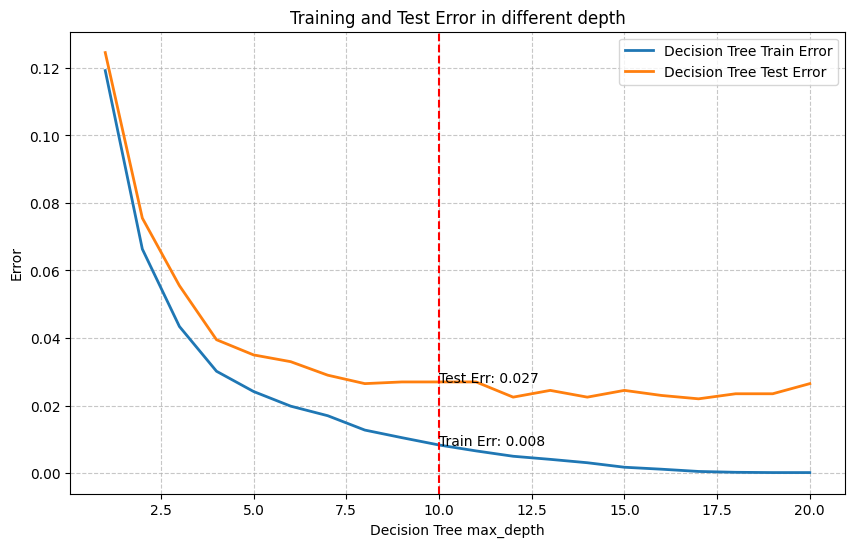

In [47]:
# Print training and test errors at max_depth=10
depth_index = 10 - 1
print("Train error at max_depth=10:", dt_train_errors[depth_index])
print("Test error at max_depth=10:", dt_test_errors[depth_index])

# Plot
plt.figure(figsize=(10, 6))

# Decision Tree curves
plt.plot(depths, dt_train_errors, label="Decision Tree Train Error", linewidth=2)
plt.plot(depths, dt_test_errors, label="Decision Tree Test Error", linewidth=2)

plt.xlabel("Decision Tree max_depth")
plt.ylabel("Error")
plt.title("Training and Test Error in different depth")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)



# Mark max_depth = 10 with a vertical line
plt.axvline(x=10, color="red", linestyle="--", label="max_depth = 10")

# Optionally, annotate the errors at max_depth = 10
plt.annotate(f"Train Err: {dt_train_errors[depth_index]:.3f}", xy=(11, dt_train_errors[depth_index]),
             xytext=(10, dt_train_errors[depth_index]))
plt.annotate(f"Test Err: {dt_test_errors[depth_index]:.3f}", xy=(11, dt_test_errors[depth_index]),
             xytext=(10, dt_test_errors[depth_index]))


plt.show()

### Q. Based on the data distribution, should we choose accuracy as the main metric? or should it be precision or recall? Explain the reason. The main metric should be able to assess model’s correct performance (No diplomatic answers).

Answer:
* Since there are equal numbers of Trousers and Pullovers in both training datasets and test datasets, and there is no actual harm in real world or penalization to the model if it classify the item wrong (either classify a trouser as pullover or vice versa), we could say that accuracy is sufficient for the purpose of being a main metric.

### Q. Compare the strengths and weaknesses of each model. From the test set, you can share some examples correctly predicted by one model but mispredicted by another.

Answer:
1. Decision Tree:
* Strength:
    *  Can find the most discriminative pixels and make decisions based on them.
* Weakness:
    * If the tree grows too large, it will easily overfit the training data.
    * Not good at dealing noises. (More on this in the following bulletpoint)

2. Naive Bayes:
* Strength:
    * Simple to implement from scratch, and it is easy to compute and train.
    * Make good classification on images that have large areas of black or white
* Weakness:
    * Not good at classifying images with specific details. (More on this in the following bulletpoint)
3. Share some examples of wrong predictions for each models:
* I create a function that can list the wrong prediction(including its probabilities) according its index in the training data.
* After filtering the wrong results, I pick the first 10 data points and visualize them.
* From the visualization, we can see that:
    * In cases the Decision Tree mis-predict:
        *  The model is not good at classifying images that have small noise pixels inside a silhouette. If a pullover image has black pixels inside a large area of white pixels, it may predict the wrong class.
    * In cases that Naive Bayes mis-predict:
        * The model is not good at interpreting small details, like index 61, 113, 119. (could wrongly predict images that have two seperate lines of white pixels which looks like trouser legs)

In [48]:
def find_misprediction(X, true_values, model):
  pred_y = model.predict(X)
  # Find the index of mis-predicted data
  mispredict_index = np.where(pred_y != true_values)[0]

  # Filter the mis-predicted data using the index found above
  mispredict_X = X[mispredict_index]
  mispredict_true_values = true_values[mispredict_index]
  mispredict_pred_y = pred_y[mispredict_index]
  mispredict_prob = model.predict_proba(mispredict_X)

  return mispredict_index, mispredict_X, mispredict_true_values, mispredict_pred_y, mispredict_prob

In [49]:
# Find 3 mis-predicted samples:
mispredict_index_dt, mispredict_X_dt, mispredict_true_dt, mispredict_pred_dt, mispredict_prob_dt = find_misprediction(test_X, test_y, tree_classifier)
mispredict_index_nb, mispredict_X_nb, mispredict_true_nb, mispredict_pred_nb, mispredict_prob_nb = find_misprediction(test_X, test_y, bernoulli_classifier)

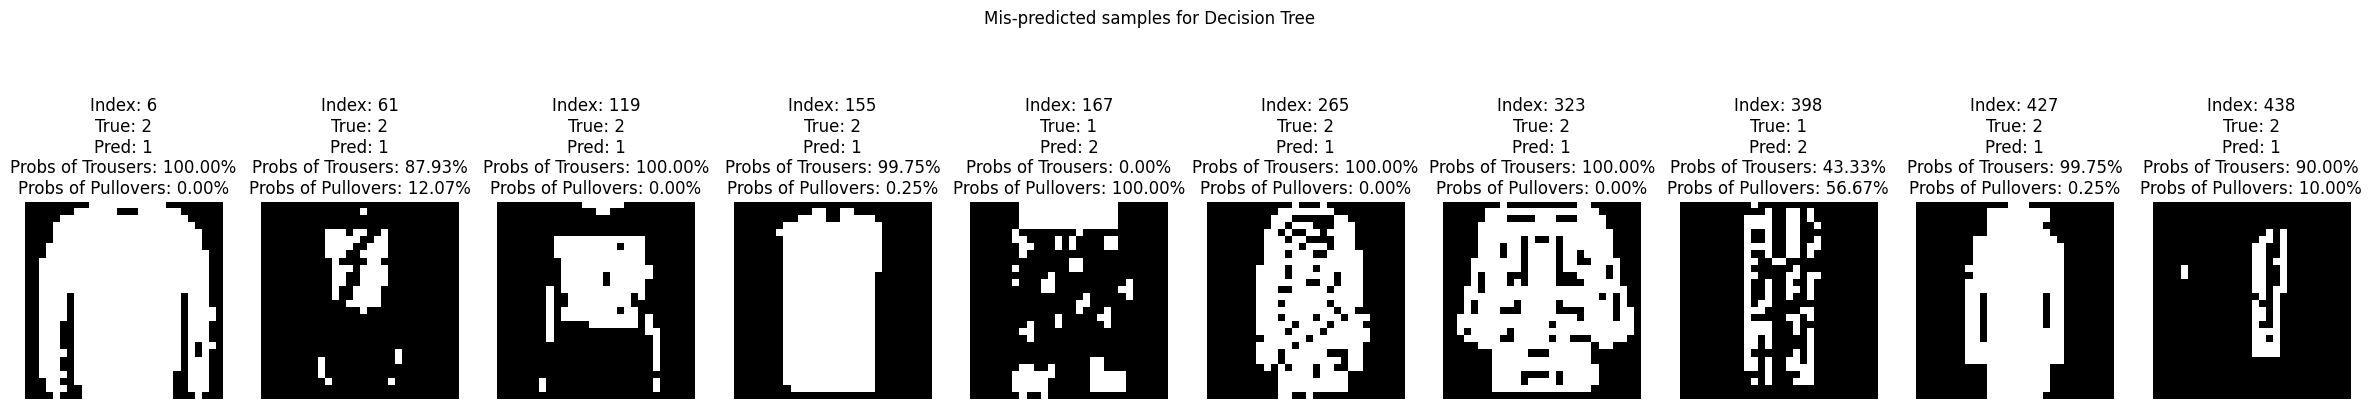

In [50]:
# Plot 10 mis-predicted samples for Decision Tree
plt.figure(figsize=(30, 6))
plt.suptitle("Mis-predicted samples for Decision Tree")
for i in range(10):
    idx = mispredict_index_dt[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(mispredict_X_dt[i].reshape(28, 28), cmap="gray")
    plt.title(f"Index: {idx}\nTrue: {mispredict_true_dt[i]}\nPred: {mispredict_pred_dt[i]}\nProbs of Trousers: {mispredict_prob_dt[i][0]*100:.2f}%\nProbs of Pullovers: {mispredict_prob_dt[i][1]*100:.2f}%")
    plt.axis("off")
plt.show()

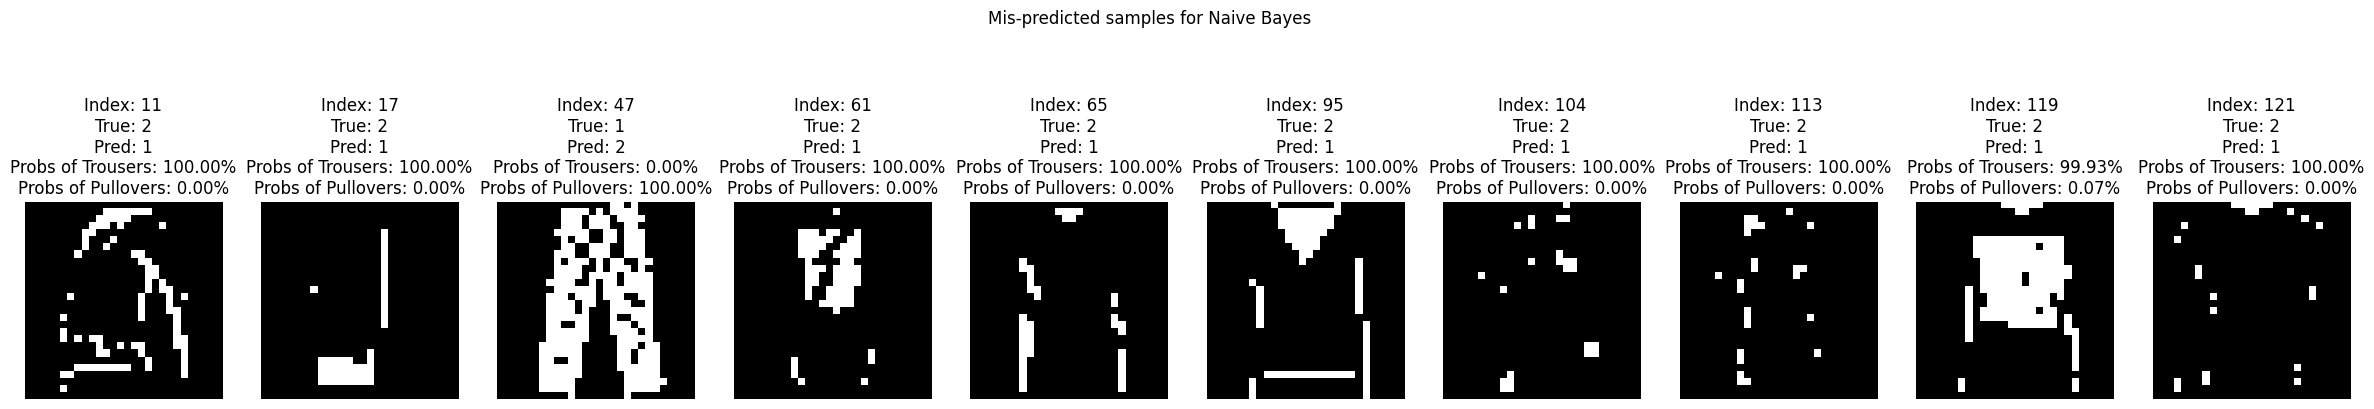

In [51]:
# Plot 10 mis-predicted samples for Naive Bayes
plt.figure(figsize=(30, 6))
plt.suptitle("Mis-predicted samples for Naive Bayes")
for i in range(10):
    idx = mispredict_index_nb[i]
    plt.subplot(1, 10, i + 1)
    plt.imshow(mispredict_X_nb[i].reshape(28, 28), cmap="gray")
    plt.title(f"Index: {idx}\nTrue: {mispredict_true_nb[i]}\nPred: {mispredict_pred_nb[i]}\nProbs of Trousers: {mispredict_prob_nb[i][0]*100:.2f}%\nProbs of Pullovers: {mispredict_prob_nb[i][1]*100:.2f}%")
    plt.axis("off")
plt.show()

* From the "manual" check below, we could find the index 11 of the data is correctly predicted by Decision Tree, but Naive Bayes failed (being listes in the images above)
* Also, index 6 of the data is correctly predicted by Naive Bayes, but Decision Tree did not (also being listed in the images above)
* Note: we can see that the data at index 61 is predicted wrong by both models

In [52]:
# Radomly check whether an item mis-predicted by Decision Tree is correctly predicted by Naive Bayes (and vice versa)
print("Check Decision Tree correctly predicted but Naive Bayes mis-predicted:")
print("Decision Tree's prediction: (position 0 is Trousers, position 1 is Pullovers): ", tree_classifier.predict_proba(test_X)[11])
print("True Label (1 is Trouser, 2 is Pullover):", test_y[11])
print("="*100)
print("Check Naive Bayes correctly predicted but Decision Tree mis-predicted:")
print("Naive Bayes' prediction: (position 0 is Trousers, position 1 is Pullovers): ", bernoulli_classifier.predict_proba(test_X)[6])
print("True Label (1 is Trouser, 2 is Pullover):", test_y[6])

Check Decision Tree correctly predicted but Naive Bayes mis-predicted:
Decision Tree's prediction: (position 0 is Trousers, position 1 is Pullovers):  [0. 1.]
True Label (1 is Trouser, 2 is Pullover): 2
Check Naive Bayes correctly predicted but Decision Tree mis-predicted:
Naive Bayes' prediction: (position 0 is Trousers, position 1 is Pullovers):  [0. 1.]
True Label (1 is Trouser, 2 is Pullover): 2


# 4. Bonus Section
In binarization, vary the threshold ‘del’ from 100 to 200 in the interval of 10. Basically, new thresholds would be 100, 110, 120, 130, and so until 200. Retrain the models for these thresholds of binarization and select the Naive bayes and decision tree giving the best performance according to the main metric. Explain and analyze why certain threshold yielded the best performance.

Answer:
* Best Performance:
    * Bernoulli Naive Bayes: Threshold: 100, Test Acc.: 95%
    * Decision Tree: Threshold: 110, Test Acc.: 98%
* Why Lower Threshold Work:
    * The binarization function is converting lighter pixels (intensity >= threshold) into 1.
    * In cmap, 1 is displayed as white and 0 is displayed as black. Thus, lower threshold means we have more whites.
    * Low threshold will perserve more details on the edges of one image, and provides more information to the models
* Why Higher Threshold Doesn't Work:
    * As Fashion MNIST datasets are all grayscaled, higher threshold means fewer pixels are converted into 1 (Given the current implmentation of our binaizarion function)
    * Fewer pixels are converted into 1 means we are creating sparser binary images, making images less representative as clothings. (Image might be mostly 0s, meaning it is darker)

In [53]:
# Load data again
train_X = pd.read_csv("train_images.csv", header=None)
train_y = pd.read_csv("train_labels.csv", header=None)
test_X = pd.read_csv("test_images.csv", header=None)
test_y = pd.read_csv("test_labels.csv", header=None)

train_mask = (train_y[0]== 1) | (train_y[0]== 2)
test_mask = (test_y[0]== 1) | (test_y[0]== 2)

train_X = train_X[train_mask]
train_y = train_y[train_mask].to_numpy().reshape(-1)
test_X = test_X[test_mask]
test_y = test_y[test_mask].to_numpy().reshape(-1)

In [54]:
# Redefine the binarization function
def binarization(X, threshold):
    output = (X >= threshold).astype(int)
    return output

In [55]:
DEL_THRESHOLD = np.arange(100, 210, 10)
train_acc_nb = []
test_acc_nb = []
train_acc_dt = []
test_acc_dt = []

for threshold in DEL_THRESHOLD:
    temp_X = binarization(train_X, threshold)
    temp_test_X = binarization(test_X, threshold)

    # Train Naive Bayes
    nb_classifier = BernoulliNaiveBayesClassifier(alpha=1, N=2)
    nb_classifier.fit(temp_X, train_y.reshape(-1))

    # Evaluate Naive Bayes
    nb_train_pred = nb_classifier.predict(temp_X)
    nb_test_pred = nb_classifier.predict(temp_test_X)
    
    # Add accuracy to the list
    train_acc_nb.append(accuracy_score(train_y, nb_train_pred))
    test_acc_nb.append(accuracy_score(test_y, nb_test_pred))

    # Train Decision Tree
    dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=10)
    dt_classifier.fit(temp_X, train_y.reshape(-1))

    # Evaluate Decision Tree
    dt_train_pred = dt_classifier.predict(temp_X)
    dt_test_pred = dt_classifier.predict(temp_test_X)

    # Add accuracy to the list
    train_acc_dt.append(accuracy_score(train_y, dt_train_pred))
    test_acc_dt.append(accuracy_score(test_y, dt_test_pred))

    # Print the information in each iteration
    print("Threshold:", threshold)
    print("Train Accuracy (Naive Bayes):", train_acc_nb[-1])
    print("Test Accuracy (Naive Bayes):", test_acc_nb[-1])
    print("Train Accuracy (Decision Tree):", train_acc_dt[-1])
    print("Test Accuracy (Decision Tree):", test_acc_dt[-1])

Threshold: 100
Train Accuracy (Naive Bayes): 0.94925
Test Accuracy (Naive Bayes): 0.951
Train Accuracy (Decision Tree): 0.9963333333333333
Test Accuracy (Decision Tree): 0.976
Threshold: 110
Train Accuracy (Naive Bayes): 0.94325
Test Accuracy (Naive Bayes): 0.9445
Train Accuracy (Decision Tree): 0.99525
Test Accuracy (Decision Tree): 0.977
Threshold: 120
Train Accuracy (Naive Bayes): 0.9365
Test Accuracy (Naive Bayes): 0.9405
Train Accuracy (Decision Tree): 0.9944166666666666
Test Accuracy (Decision Tree): 0.977
Threshold: 130
Train Accuracy (Naive Bayes): 0.9294166666666667
Test Accuracy (Naive Bayes): 0.9325
Train Accuracy (Decision Tree): 0.9910833333333333
Test Accuracy (Decision Tree): 0.975
Threshold: 140
Train Accuracy (Naive Bayes): 0.9189166666666667
Test Accuracy (Naive Bayes): 0.9205
Train Accuracy (Decision Tree): 0.9891666666666666
Test Accuracy (Decision Tree): 0.967
Threshold: 150
Train Accuracy (Naive Bayes): 0.9058333333333334
Test Accuracy (Naive Bayes): 0.9065
Train 

Best Naive Bayes Threshold: 100, Test Accuracy: 0.95
Best Decision Tree Threshold: 110, Test Accuracy: 0.98


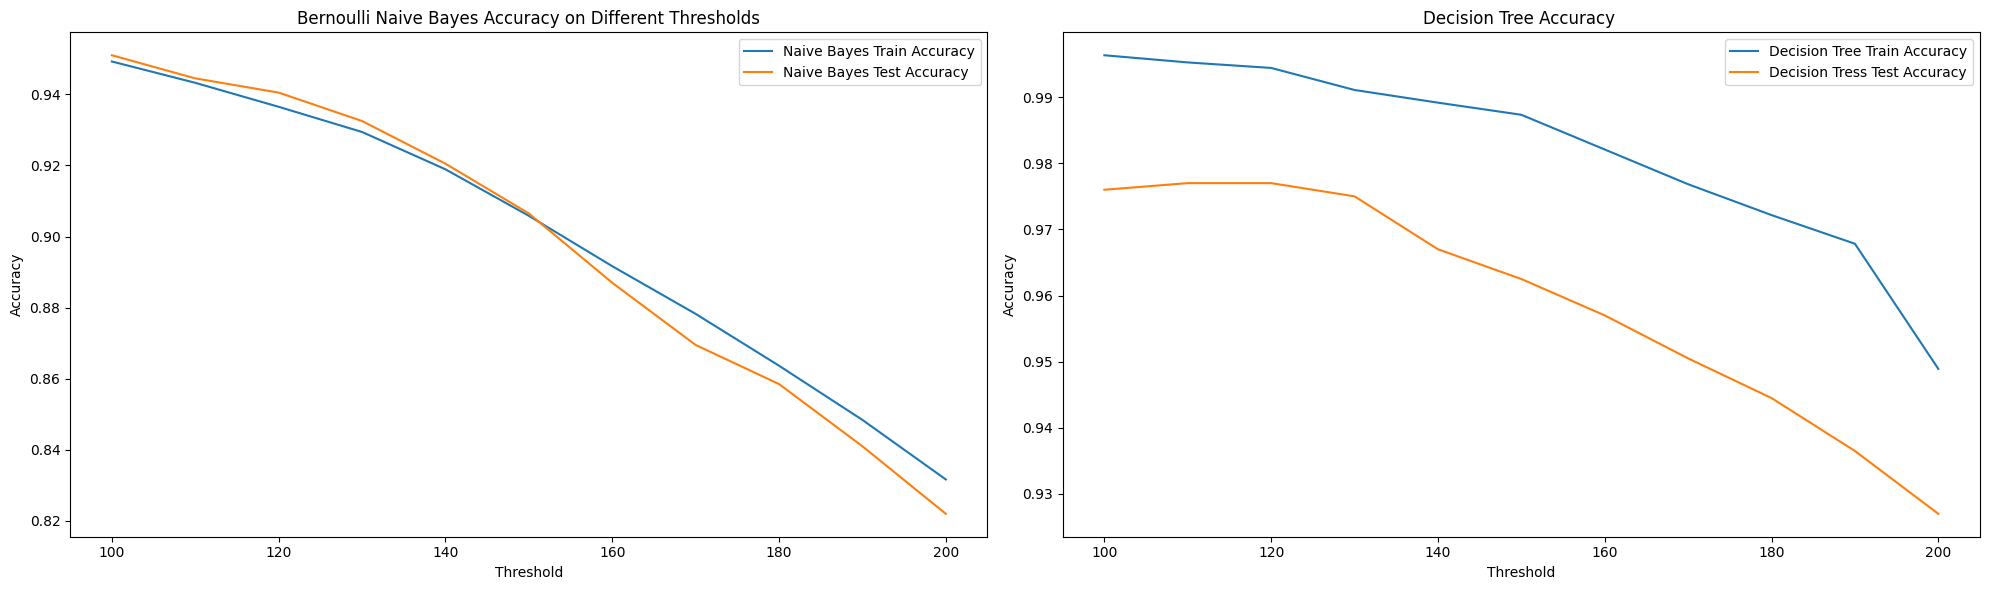

In [56]:
# Find best thresholds
best_nb_threshold = DEL_THRESHOLD[np.argmax(test_acc_nb)]
best_nb_test_acc = max(test_acc_nb)
best_dt_threshold = DEL_THRESHOLD[np.argmax(test_acc_dt)]
best_dt_test_acc = max(test_acc_dt)

print(f"Best Naive Bayes Threshold: {best_nb_threshold}, Test Accuracy: {best_nb_test_acc:.2f}")
print(f"Best Decision Tree Threshold: {best_dt_threshold}, Test Accuracy: {best_dt_test_acc:.2f}")

# Plot results
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(DEL_THRESHOLD, train_acc_nb, label="Naive Bayes Train Accuracy")
plt.plot(DEL_THRESHOLD, test_acc_nb, label="Naive Bayes Test Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Bernoulli Naive Bayes Accuracy on Different Thresholds")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(DEL_THRESHOLD, train_acc_dt, label="Decision Tree Train Accuracy")
plt.plot(DEL_THRESHOLD, test_acc_dt, label="Decision Tress Test Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy ")
plt.legend()

plt.tight_layout()
plt.show()

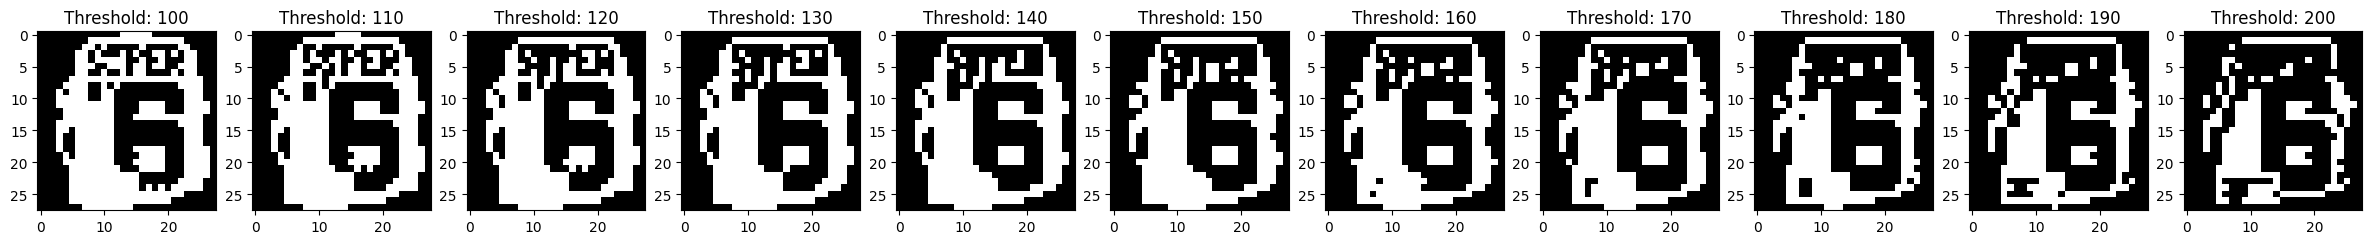

In [57]:
# Sample image
train_X = pd.read_csv("train_images.csv", header=None)
sample_image = train_X.iloc[6000].values.reshape(28, 28)

# Plot the images with different thresholds
plt.figure(figsize=(30, 3))
for i, threshold in enumerate(DEL_THRESHOLD):
    binarized = binarization(sample_image, threshold)
    plt.subplot(1, len(np.arange(100, 210, 10)), i + 1)
    plt.imshow(binarized.reshape(28, 28), cmap="gray")
    plt.title(f"Threshold: {threshold}")
plt.show()